#1.)set up

In [2]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import re
from matplotlib.backends.backend_pdf import PdfPages
#pp = PdfPages('multipage.pdf')

In [3]:
#***********don't include in python script
#load number lines for end of headers from full data 
headerlines=pd.read_table('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/header_ends.dat')

In [4]:
#variable for the length of the unseparated data called sabrina.dat
#setting this variable with the len() function would make your code easier to manage if you change anything about your data
#even if you don't change your data, it will make your code more reusable
length_of_file=12624

In [5]:
#While loop to load data into a list by sepparating chunks by observation periods

#Assign variables 
#Length of data file 
length_of_file=12624
#skipped rows is equal to the number of rows at the bottom of the file to skip
skipped_footer = length_of_file
#header row is equal to the row that contains the header for the data
header_row = 10
#table will store the each chunk of observation time data as an item in a list
table = []

#Variable to tell me how many times the loop is ran 
observation_periods=0

#loops will continue to go, until all the data has been read
while skipped_footer > 0:
    #shifts the skipped footer down the length of a table 
    skipped_footer -= 526
    #dataframe is the dataframe that contains the data
    dataframe = pd.read_table('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/sabrina.dat', sep='\s+', header=header_row, skipfooter = skipped_footer, engine='python')
    #appends the dataframe to the list
    table.append(dataframe)
    #Renamed Ampl(JY) to avoide syntax errors
    dataframe.columns=['Channel','IF','Polar','Frequency','Velocity','Amplitude','Phase']
    #converted Ampl from str(because of E) to float 
    dataframe['Amplitude']=dataframe[1:]['Amplitude'].astype(float)
    #shifts the header row to the next table in the data
    header_row += 523
    #count each time list is ran through
    observation_periods+=1

#tell how many time list was ran through (tells me how many outputs I should get from now on)
print(observation_periods)

24


In [6]:
#I need some test to say if 511 rows should be printed for each data chunk

In [7]:
#check table holds right values
table[0].head()

,Channel,IF,Polar,Frequency,Velocity,Amplitude,Phase
0,1,1,RR,1720.8099,0,NaN,NaN
1,2,1,RR,1720.8093,0,0.000259,6.040
2,3,1,RR,1720.8087,0,0.000464,-95.605
3,4,1,RR,1720.8081,0,0.000522,-106.389
4,5,1,RR,1720.8075,0,0.000423,-20.039


In [8]:
#check all tables heads/values are changed
table[1].head()

,Channel,IF,Polar,Frequency,Velocity,Amplitude,Phase
0,1,1,RR,1720.8099,0,NaN,NaN
1,2,1,RR,1720.8093,0,0.000518,18.793
2,3,1,RR,1720.8087,0,0.000300,45.620
3,4,1,RR,1720.8081,0,0.000680,-47.248
4,5,1,RR,1720.8075,0,0.000460,-36.178


#make phase diagrams
Spike in the amplitude is the detection we care about. From that we can look at the phase pts that go with that spike.

In [88]:
#Make phase diagrams 

def make_phase_diagrams():
    '''Makes all the phase diagrams for every observation period using a while loop'''
    
    #Assign Variables
    #Length of data file 
    length_of_file=12624
    #skipped rows is equal to the number of rows at the bottom of the file to skip
    skipped_footer = length_of_file
    #header row is equal to the row that contains the header for the data
    header_row = 10
    #table will store the each chunk of observation time data as an item in a list
    table = []
    #plots=[]
    
    pp=PdfPages('plots.png') 
    
    #loops will continue to go, until all the data has been read
    while skipped_footer > 0:
        #shifts the skipped footer down the length of a table 
        skipped_footer -= 526
        #dataframe is the dataframe that contains the data
        dataframe = pd.read_table('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/sabrina.dat', sep='\s+', header=header_row, skipfooter = skipped_footer, engine='python')
        #appends the dataframe to the list
        #table.append(dataframe)
        #Renamed Ampl(JY) to avoide syntax errors
        dataframe.columns=['Channel','IF','Polar','Frequency','Velocity','Amplitude','Phase']
        #converted Ampl from str(because of E) to float 
        dataframe['Amplitude']=dataframe[1:]['Amplitude'].astype(float)
        #save the list of data chunks
        #dataframe.to_csv('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/data_chunks_list.csv', delimiter=',')
    
        #Plot Channel vs. phase/ampl. for all times
        #use multi-pannel plots stacked on eachother since they share the same x-axis
        plt.figure(figsize=(10,4))

        #top subplot is for phase data
        plt.subplot (2,1,1)
        plt.scatter(dataframe.Frequency, dataframe.Phase)
        plt.ylabel('Phase')
        #only one title since both subplots together make a phase diagram 
        plt.title('Phase Diagram')#if I could get the title to change for each one that'd be cool
        #plots.append(plot1)

        #bottom subplot is amplitude data
        plt.subplot (2,1,2)
        plt.plot(dataframe.Frequency, dataframe.Amplitude, color='g')
        #how do I get the scale to be numbers like 1720....#######
        plt.xlim(1720.48, 1720.82)
        #only one x-axis label since both subplots share the same x-axis
        plt.xlabel('Tunned Frequency')
        plt.ylabel('Amplitude(Jy)')
        #plots.append(plot2)
        
        plt.show()
        pp.savefig()
        pp.close()
        
        
        #shifts the header row to the next table in the data
        header_row += 523
    

/Users/sabrinadesoto/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


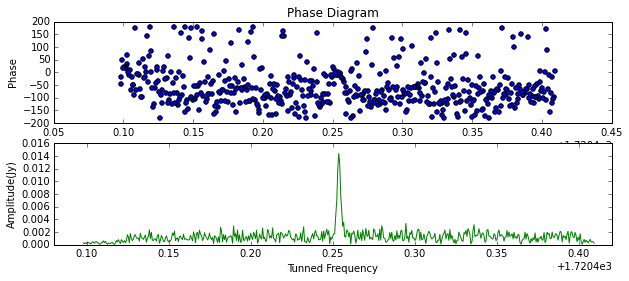

ValueError: No such figure: None

In [89]:
make_phase_diagrams()

AttributeError: 'function' object has no attribute 'get_xaxis'

/Users/sabrinadesoto/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


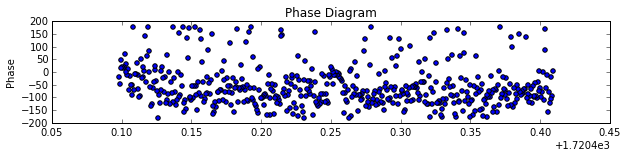

In [11]:
#Single table[0] plot
#use multi-pannel plots stacked on eachother

plt.figure(figsize=(10,4))
plt.axes(frameon=False)

#subplot 1-phase
plt.subplot (2,1,1)
#need to limit input to each chunk of data
plt.scatter(table[0].Frequency, table[0].Phase)
#I don't want it to show the x-axis?
plt.ylabel('Phase')
plt.title('Phase Diagram')
plt.axes.get_xaxis().set_visible(False)

#subplot 2-ampl.
plt.subplot (2,1,2)
plt.plot(table[0].Frequency, table[0].Amplitude, color='g')
#how do I get the scale to be numbers like 1720....
plt.xlim(1720.48, 1720.82)

plt.xlabel('Tunned Frequency')
plt.ylabel('Amplitude(Jy)')

plt.savefig('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/Phase_Diagram0.pdf')
plt.show()

#Get Signal Phase from Data

In [ ]:
#Start with basic function to return ampl. values > threshold 
def signal_phase_range_1(data, column):
    '''Function that reads through amplitudes and returns amplitudes > constant threshold'''
    #signal is defined as pts over a threshold value
    #define threshold value (here I just assigned one but should be done by stats or something)
    threshold_ampl=0.010
    
    #Create list to hold signal aplitudes
    signal_ampl_list = []
    for values in column: 
        if values >= threshold_ampl:
            #type(values) 
            #print(type(values))
            signal_ampl_list.append(values)
    return signal_ampl_list         

In [ ]:
#Run loop to get all times ampl>threshold values 
#skipped rows is equal to the number of rows at the bottom of the file to skip
skipped_footer = length_of_file
#header row is equal to the row that contains the header for the data
header_row = 10
#table will store the each chunk of observation time data as an item in a list
table = []
#store each chunk of Signal Amplitude (SA, Ampl>threshold) data
SA = []

#loops will continue to go, until all the data has been read
while skipped_footer > 0:
    #shifts the skipped footer down the length of a table 
    skipped_footer -= 526
    #dataframe is the dataframe that contains the data
    dataframe = pd.read_table('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/sabrina.dat', sep='\s+', header=header_row, skipfooter = skipped_footer, engine='python')
    #appends the dataframe to the list
    table.append(dataframe)
    #Renamed Ampl(JY) to avoide syntax errors
    dataframe.columns=['Channel','IF','Polar','Frequency','Velocity','Amplitude','Phase']
    #converted Ampl from str(because of E) to float 
    dataframe['Amplitude']=dataframe[1:]['Amplitude'].astype(float)
    #save the list of data chunks
    dataframe.to_csv('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/data_chunks_list.csv', delimiter=',')
    
    signal_phase_range_1(dataframe, dataframe.Amplitude)
    x = signal_phase_range_1(dataframe, dataframe.Amplitude)
    sig_ampl=pd.DataFrame({'Amplitude':x})
    SA.append(sig_ampl)
    
    
    #shifts the header row to the next table in the data
    header_row += 523

In [ ]:
#check that loop return same signal ampl values as running it outside loop:
SA[0]

In [ ]:
#test function step 1 for small data
signal_phase_range_1(table[0], table[0].Amplitude)

In [ ]:
#Assign array values from function to a table 
x = signal_phase_range_1(table[0], table[0].Amplitude)
sig_ampl=pd.DataFrame({'Amplitude':x})
sig_ampl

In [ ]:
#check that loop return different signal ampls for every observation time:
SA[2]

In [ ]:
#merge data to get columns for detection ampl only
result= pd.merge(table[0], sig_ampl, on='Amplitude')
result

In [ ]:
#Average phase values
result['Phase'].mean()

In [ ]:
#Run loop to get all detection Phase averages 

#skipped rows is equal to the number of rows at the bottom of the file to skip
skipped_footer = length_of_file
#header row is equal to the row that contains the header for the data
header_row = 10
#table will store the each chunk of observation time data as an item in a list
table = []
#store each chunk of Signal Amplitude (SA, Ampl>threshold) data
SA = []
#store set of signal data (SD) corresponding to a signal ampl
SD =[]


#loops will continue to go, until all the data has been read
while skipped_footer > 0:
    #shifts the skipped footer down the length of a table 
    skipped_footer -= 526
    #dataframe is the dataframe that contains the data
    dataframe = pd.read_table('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/sabrina.dat', sep='\s+', header=header_row, skipfooter = skipped_footer, engine='python')
    #appends the dataframe to the list
    table.append(dataframe)
    #Renamed Ampl(JY) to avoide syntax errors
    dataframe.columns=['Channel','IF','Polar','Frequency','Velocity','Amplitude','Phase']
    #converted Ampl from str(because of E) to float 
    dataframe['Amplitude']=dataframe[1:]['Amplitude'].astype(float)
    #save the list of data chunks
    dataframe.to_csv('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/data_chunks_list.csv', delimiter=',')
    
    signal_phase_range_1(dataframe, dataframe.Amplitude)
    x = signal_phase_range_1(dataframe, dataframe.Amplitude)
    sig_ampl=pd.DataFrame({'Amplitude':x})
    SA.append(sig_ampl)
    
    #merge data to get columns for detection ampl only
    signal_data= pd.merge(dataframe, sig_ampl, on='Amplitude')
    SD.append(signal_data)
    
    #shifts the header row to the next table in the data
    header_row += 523

In [ ]:
#check that it prints data chunks corresponding to signal ampl
#as done for chunk 2 in previous step 
SD[2]

In [ ]:
SA[2]

In [ ]:
#Run loop that will get average signal phase for each observation time 

#skipped rows is equal to the number of rows at the bottom of the file to skip
skipped_footer = length_of_file
#header row is equal to the row that contains the header for the data
header_row = 10
#table will store the each chunk of observation time data as an item in a list
table = []
#store each chunk of Signal Amplitude (SA, Ampl>threshold) data
SA = []
#store set of signal data (SD) corresponding to a signal ampl
SD =[]
#store average signal phase (ASP)
ASP =[]

#loops will continue to go, until all the data has been read
while skipped_footer > 0:
    #shifts the skipped footer down the length of a table 
    skipped_footer -= 526
    #dataframe is the dataframe that contains the data
    dataframe = pd.read_table('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/sabrina.dat', sep='\s+', header=header_row, skipfooter = skipped_footer, engine='python')
    #appends the dataframe to the list
    table.append(dataframe)
    #Renamed Ampl(JY) to avoide syntax errors
    dataframe.columns=['Channel','IF','Polar','Frequency','Velocity','Amplitude','Phase']
    #converted Ampl from str(because of E) to float 
    dataframe['Amplitude']=dataframe[1:]['Amplitude'].astype(float)
    #save the list of data chunks
    dataframe.to_csv('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/data_chunks_list.csv', delimiter=',')
    
    signal_phase_range_1(dataframe, dataframe.Amplitude)
    x = signal_phase_range_1(dataframe, dataframe.Amplitude)
    sig_ampl=pd.DataFrame({'Amplitude':x})
    SA.append(sig_ampl)
    
    #merge data to get columns for detection ampl only
    signal_data= pd.merge(dataframe, sig_ampl, on='Amplitude')
    SD.append(signal_data)
    
    #Average phase values
    Ave_phase=signal_data['Phase'].mean()
    ASP.append(Ave_phase)
    
    #shifts the header row to the next table in the data
    header_row += 523

In [ ]:
#test Average signal phase is the same as calculated out of loop
ASP[0]

In [ ]:
SD[0]['Phase'].mean()

In [ ]:
#test its different for each observation time 
ASP[2]

In [ ]:
SD[2]['Phase'].mean()

In [ ]:
#Write average signal phases for each observation period to a saved csv file 
#Run loop that will get average signal phase for each observation time 

#skipped rows is equal to the number of rows at the bottom of the file to skip
skipped_footer = length_of_file
#header row is equal to the row that contains the header for the data
header_row = 10
#table will store the each chunk of observation time data as an item in a list
table = []
#store each chunk of Signal Amplitude (SA, Ampl>threshold) data
SA = []
#store set of signal data (SD) corresponding to a signal ampl
SD =[]
#store average signal phase (ASP)
ASP =[]

#loops will continue to go, until all the data has been read
while skipped_footer > 0:
    #shifts the skipped footer down the length of a table 
    skipped_footer -= 526
    #dataframe is the dataframe that contains the data
    dataframe = pd.read_table('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/sabrina.dat', sep='\s+', header=header_row, skipfooter = skipped_footer, engine='python')
    #appends the dataframe to the list
    table.append(dataframe)
    #Renamed Ampl(JY) to avoide syntax errors
    dataframe.columns=['Channel','IF','Polar','Frequency','Velocity','Amplitude','Phase']
    #converted Ampl from str(because of E) to float 
    dataframe['Amplitude']=dataframe[1:]['Amplitude'].astype(float)
    #save the list of data chunks
    dataframe.to_csv('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/data_chunks_list.csv', delimiter=',')
    
    signal_phase_range_1(dataframe, dataframe.Amplitude)
    x = signal_phase_range_1(dataframe, dataframe.Amplitude)
    sig_ampl=pd.DataFrame({'Amplitude':x})
    SA.append(sig_ampl)
    
    #merge data to get columns for detection ampl only
    signal_data= pd.merge(dataframe, sig_ampl, on='Amplitude')
    SD.append(signal_data)
    
    #Average phase values
    Ave_phase=signal_data['Phase'].mean()
    #send values to a list
    ASP.append(Ave_phase)
    #save list of average phase value for each observation period to a dataframe
    ave_sig_phase=pd.DataFrame({'ave_phase':ASP}) 
    
    #shifts the header row to the next table in the data
    header_row += 523

#return completed table of average signal phases
ave_sig_phase.head()

#find the fringe size for each observation period

In [ ]:
fringe_data=pd.read_excel('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/Fringe_data.xlsx', sep=',')
fringe_data.head()